![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Lab | Customer Analysis Round 7

For this lab, we still keep using the `marketing_customer_analysis.csv` file that you can find in the `files_for_lab` folder.

Remember the previous rounds. Follow the steps as shown in previous lectures and try to improve the accuracy of the model. Include both categorical columns in the exercise.
Some approaches you can try in this exercise:

- use the concept of multicollinearity and remove insignificant variables
- use a different method of scaling the numerical variables
- use a different ratio of train test split
- use the transformation on numerical columns which align it more towards a normal distribution

### Get the data

We are using the `marketing_customer_analysis.csv` file.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df1 = pd.read_excel("files_for_lab/excel_files/marketing_customer_analysis.xlsx")
df1

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


### Dealing with the data

Already done in rounds 2 to 7.

**Bonus**: Build a function, from round 2 and round 7, to clean and process the data.

In [3]:
def one_for_all(df):
    
    cols = df.columns
    new_cols = []
    rows = df.shape[0]
    
    for col in cols:
        new_col = ""
        for letter in col:
            if letter == " ":
                letter = "_"
                new_col += letter
            else:
                new_col += letter
        new_cols.append(new_col.lower())
    df.columns = new_cols
    
    for col in new_cols:
        na = df[col].isna().sum()
        if na > (25*rows/100):
            df = df.drop([col], axis=1)
        else: df = df[df[col].isna()==False]
    
    num = pd.DataFrame(df.select_dtypes(np.number))
    cat = pd.DataFrame(df.select_dtypes("object"))
    
    return df, num, cat

df1, num, cat = one_for_all(df1)

In [4]:
df1 = df1.rename(columns = {"employmentstatus" : "employment_status"})

df1

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [5]:
num

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [6]:
cat

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


### Explore the data

Done in the round 3.

### Modeling

Description:

- Try to improve the linear regression model.

In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

<AxesSubplot:>

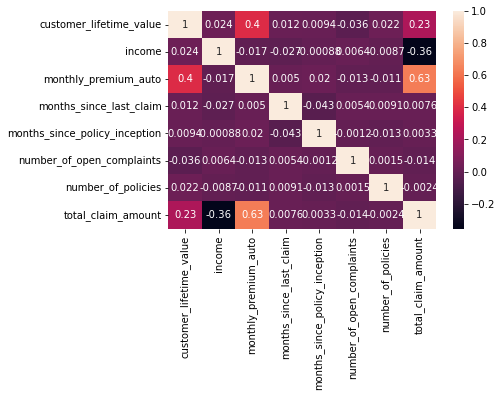

In [8]:
sns.heatmap(num.corr(), annot=True)

In [21]:
y = df1['total_claim_amount']
X = df1.drop(['total_claim_amount'], axis=1)
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = "object")

In [22]:
# Dropping useless columns

X_num = X_num.drop(["number_of_policies", "number_of_open_complaints", "months_since_policy_inception", "months_since_last_claim"], axis=1)
X_num

,customer_lifetime_value,income,monthly_premium_auto
0,2763.519279,56274,69
1,6979.535903,0,94
2,12887.431650,48767,108
3,7645.861827,0,106
4,2813.692575,43836,73
...,...,...,...
9129,23405.987980,71941,73
9130,3096.511217,21604,79
9131,8163.890428,0,85
9132,7524.442436,21941,96


<AxesSubplot:>

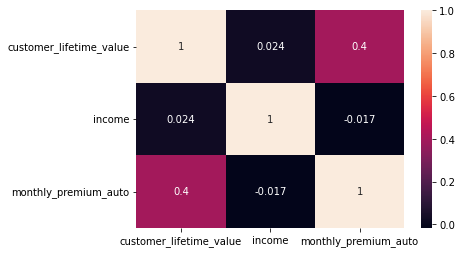

In [11]:
sns.heatmap(X_num.corr(), annot=True)

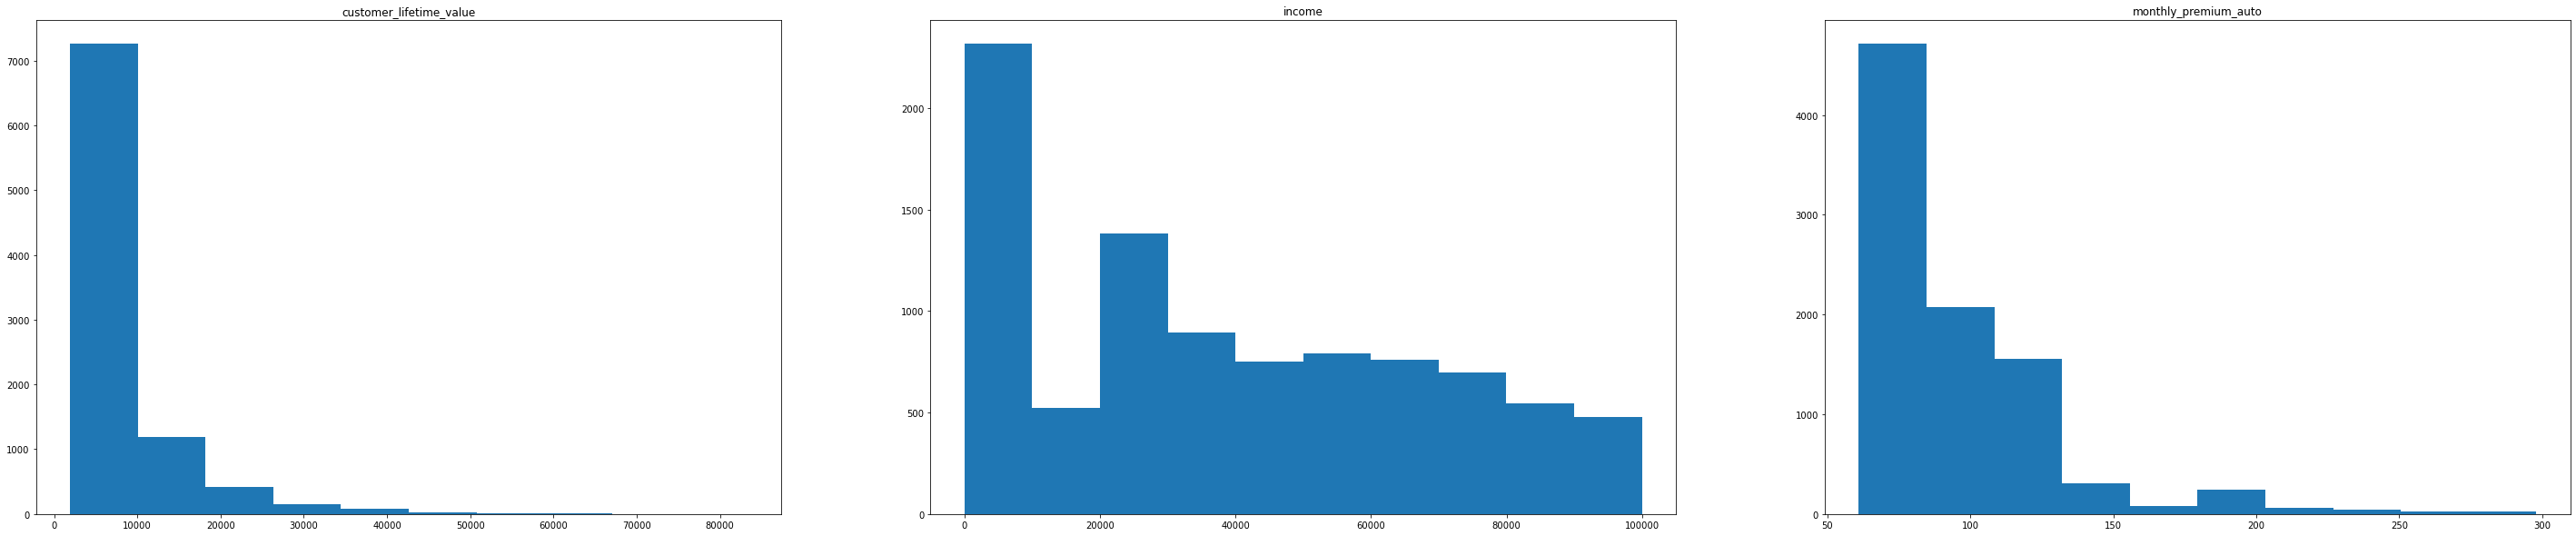

In [12]:
def hist_maker(df):
    cols = list(df.columns)
    x = len(cols)
    fig, ax = plt.subplots(1,x, figsize=(50,10))
    
    for col in cols:
        y = cols.index(col)
        ax[y].hist(data=df, x=col)
        ax[y].set_title(col)
        
    return
    
hist_maker(X_num)

ValueError: Index data must be 1-dimensional

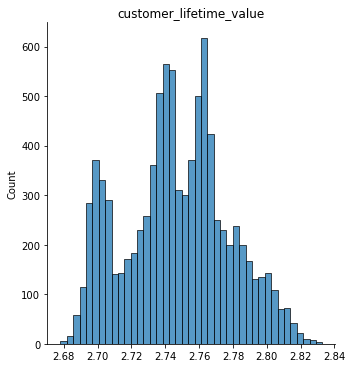

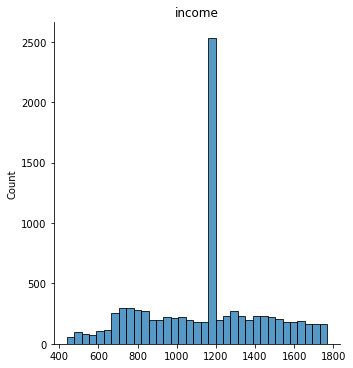

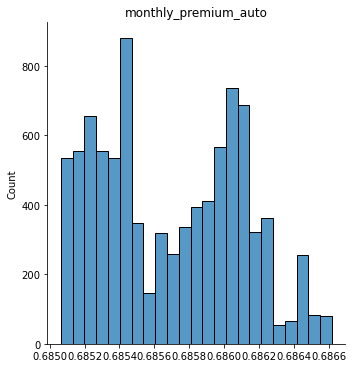

In [30]:
from scipy import stats

def box_cox_trans(df):
    
    cols = df.columns
    for col in cols:
        df[col] = np.where(df[col]<=0,0,df[col])
        mean = np.sum(df[col])/len(df[df[col]>0])
        df[col] = df[col].replace(0,mean)
        xt, lmbda = stats.boxcox(df[col])
        plot = sns.displot(xt)
        plt.title(col)
        
    return plot



X_num = pd.DataFrame(data = box_cox_trans(X_num), index = list(X_num.index), columns=X_num)

# This gives an error related to the index, I couldn't fix it but it works nonetheless

In [32]:
transformer = MinMaxScaler()
transformer.fit(X_num)
x_normalized = transformer.transform(X_num)
x_normalized = pd.DataFrame(x_normalized, columns=X_num.columns)
x_normalized

,customer_lifetime_value,income,monthly_premium_auto
0,0.010629,0.514064,0.033755
1,0.062406,0.449386,0.139241
2,0.134960,0.430601,0.198312
3,0.070589,0.449386,0.189873
4,0.011245,0.375778,0.050633
...,...,...,...
9129,0.264137,0.688250,0.050633
9130,0.014719,0.128602,0.075949
9131,0.076951,0.449386,0.101266
9132,0.069098,0.132349,0.147679


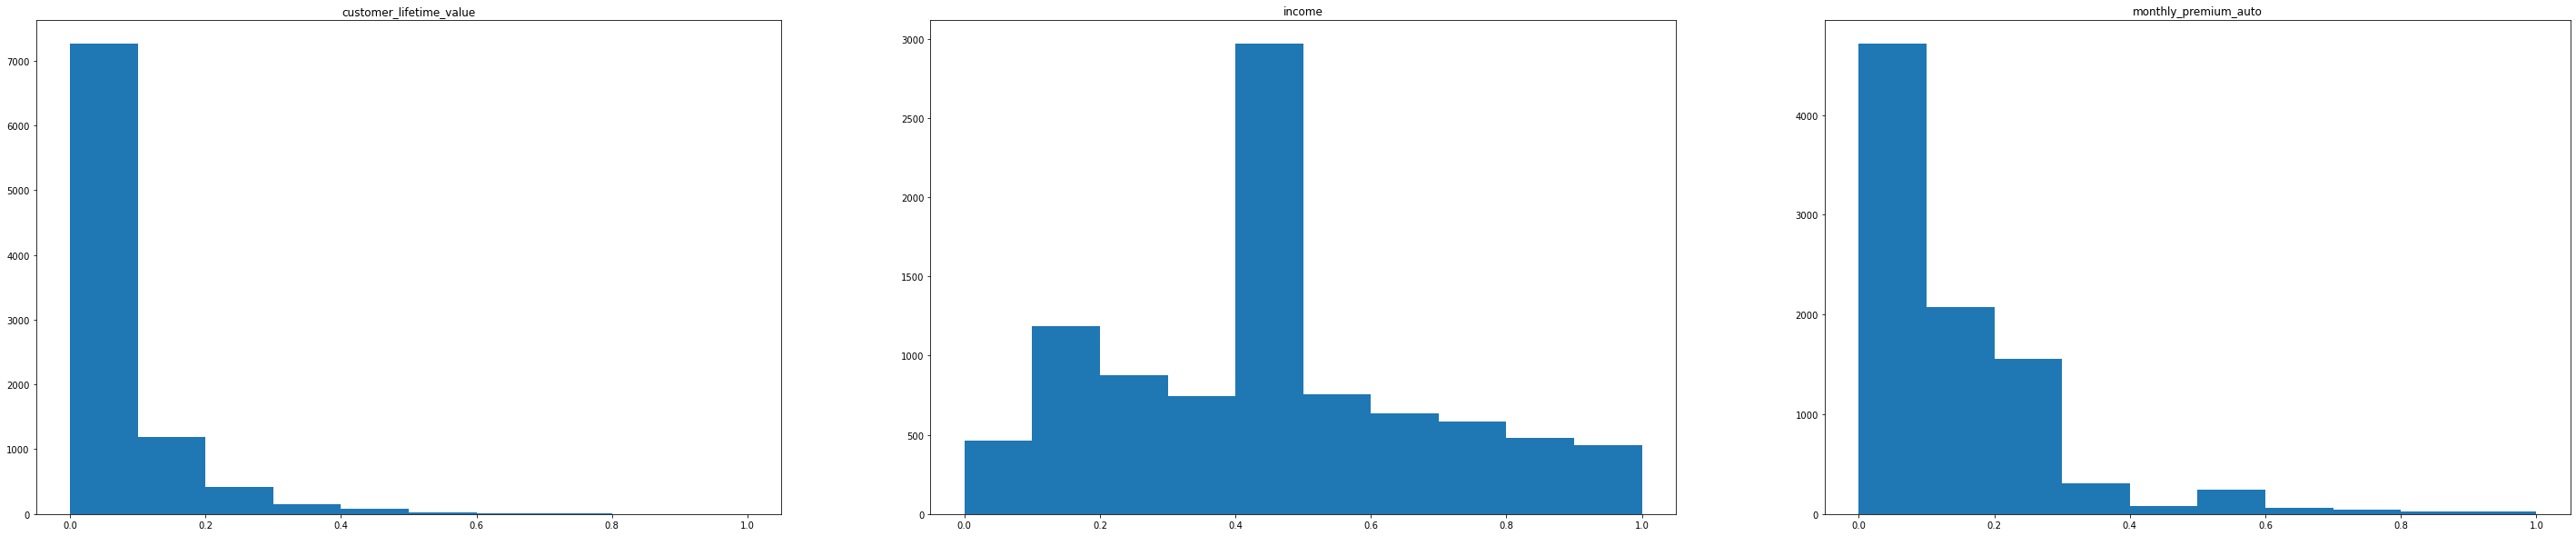

In [33]:
def hist_maker(df):
    cols = list(df.columns)
    x = len(cols)
    fig, ax = plt.subplots(1,x, figsize=(50,10))
    
    for col in cols:
        y = cols.index(col)
        ax[y].hist(data=df, x=col)
        ax[y].set_title(col)
        
    return
    
hist_maker(x_normalized)

In [34]:
transformer = StandardScaler().fit(X_num)
x_standardized = transformer.transform(X_num)
x_standardized = pd.DataFrame(x_standardized, columns=X_num.columns)
x_standardized

,customer_lifetime_value,income,monthly_premium_auto
0,-0.762878,2.770661e-01,-0.703925
1,-0.149245,3.465318e-16,0.022691
2,0.710636,-8.046961e-02,0.429596
3,-0.052263,3.465318e-16,0.371467
4,-0.755575,-3.153182e-01,-0.587666
...,...,...,...
9129,2.241590,1.023238e+00,-0.587666
9130,-0.714411,-1.374161e+00,-0.413278
9131,0.023135,3.465318e-16,-0.238891
9132,-0.069935,-1.358111e+00,0.080820


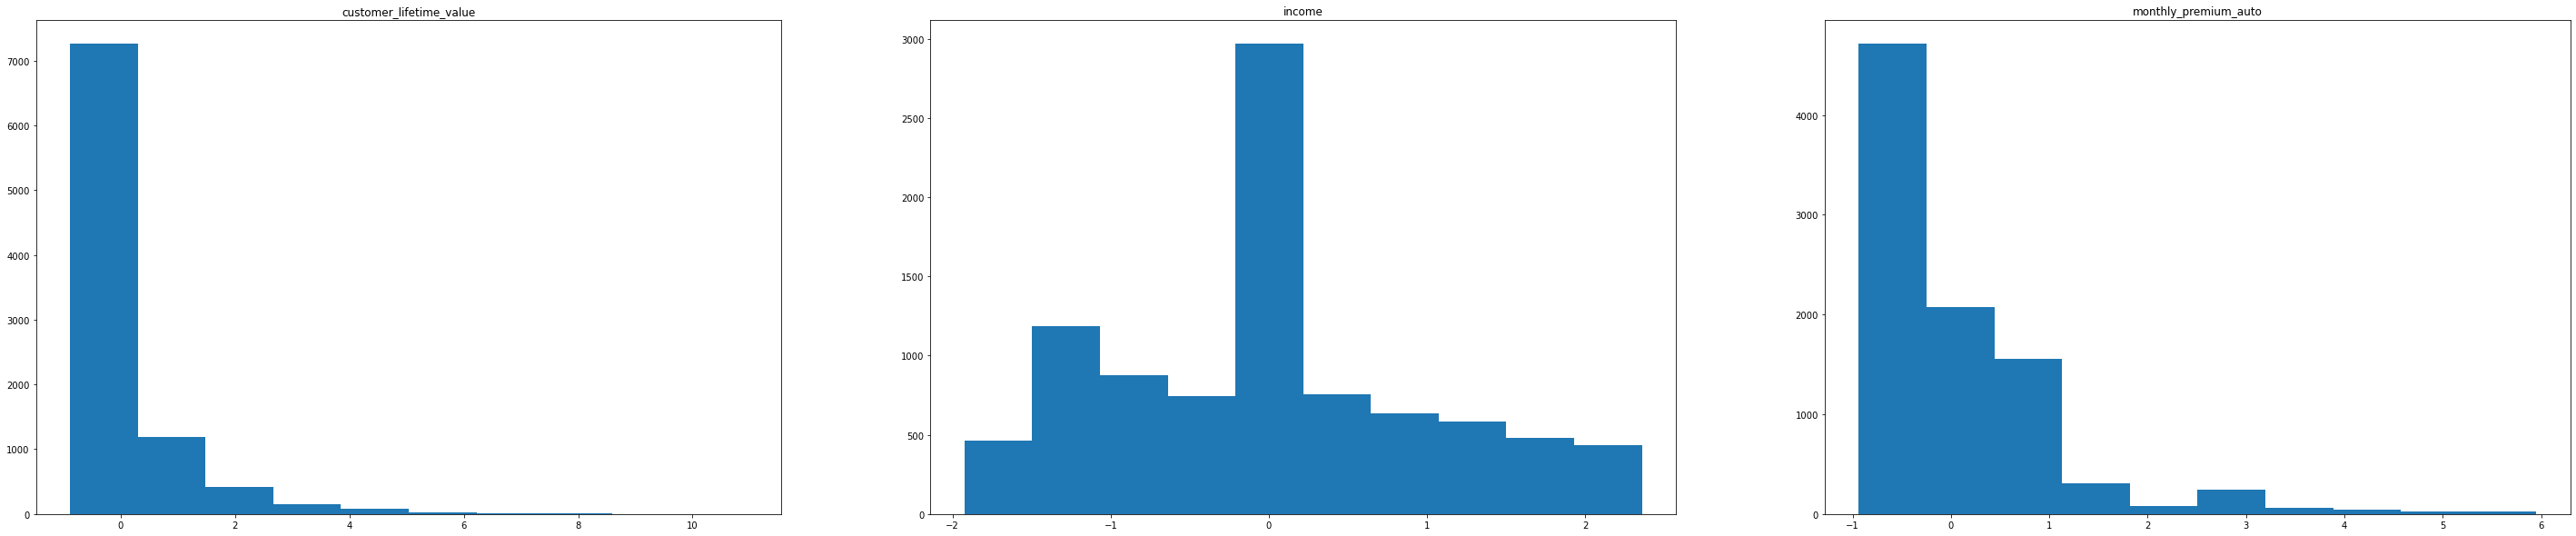

In [35]:
def hist_maker(df):
    cols = list(df.columns)
    x = len(cols)
    fig, ax = plt.subplots(1,x, figsize=(50,10))
    
    for col in cols:
        y = cols.index(col)
        ax[y].hist(data=df, x=col)
        ax[y].set_title(col)
        
    return
    
hist_maker(x_standardized)

In [36]:
X_cat

,customer,state,response,coverage,education,effective_to_date,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [37]:
def label_encoder(df, col):

    X_cat_col = pd.DataFrame(df[col])
    label_encoded = LabelEncoder().fit(X_cat_col).transform(X_cat_col)
    label_encoded = pd.DataFrame(label_encoded,columns=X_cat_col.columns)
    
    return label_encoded

state = label_encoder(X_cat, "state")
response = label_encoder(X_cat, "response")
coverage = label_encoder(X_cat, "coverage")
education = label_encoder(X_cat, "education")
effective_to_date = label_encoder(X_cat, "effective_to_date")
employment_status = label_encoder(X_cat, "employment_status")
gender = label_encoder(X_cat, "gender")
location_code = label_encoder(X_cat, "location_code")
marital_status = label_encoder(X_cat, "marital_status")
policy_type = label_encoder(X_cat, "policy_type")
policy = label_encoder(X_cat, "policy")
renew_offer_type = label_encoder(X_cat, "renew_offer_type")
sales_channel = label_encoder(X_cat, "sales_channel")
vehicle_class = label_encoder(X_cat, "vehicle_class")
vehicle_size = label_encoder(X_cat, "vehicle_size")

cat_encoded = pd.concat([state, response, coverage, education, 
                         effective_to_date, employment_status,
                         gender, location_code, marital_status, 
                         policy_type, policy, renew_offer_type, 
                         sales_channel, vehicle_class, vehicle_size, y], axis=1)
cat_encoded

# Tried to automate this with a function, but wasn't able to concatenate the DataFrames

E:\Programs\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Programs\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,state,response,coverage,education,effective_to_date,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,total_claim_amount
0,4,0,0,0,47,1,0,1,1,0,2,0,0,5,1,384.811147
1,0,0,1,0,24,4,0,1,2,1,5,2,0,0,1,1131.464935
2,2,0,2,0,41,1,0,1,1,1,5,0,0,5,1,566.472247
3,1,0,0,0,12,4,1,1,1,0,1,0,2,3,1,529.881344
4,4,0,0,0,52,1,1,0,2,1,3,0,0,0,1,138.130879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,1,0,0,0,32,1,1,2,1,1,3,1,3,0,1,198.234764
9130,1,1,1,1,34,1,0,1,0,0,2,0,1,0,1,379.200000
9131,1,0,1,0,55,4,1,1,2,0,1,0,1,0,1,790.784983
9132,1,0,1,1,52,1,1,1,1,1,4,2,1,0,0,691.200000


<AxesSubplot:>

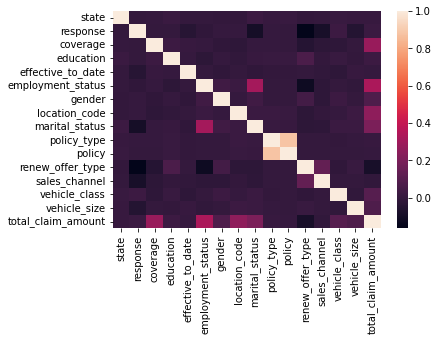

In [38]:
sns.heatmap(cat_encoded.corr())

In [39]:
# Dropping useless columns

cat_encoded = cat_encoded.drop(["state", "response", "education", 
                               "effective_to_date","gender", "policy_type",
                               "policy", "renew_offer_type", "sales_channel",
                               "vehicle_class", "vehicle_size", "total_claim_amount"], axis=1)
cat_encoded

,coverage,employment_status,location_code,marital_status
0,0,1,1,1
1,1,4,1,2
2,2,1,1,1
3,0,4,1,1
4,0,1,0,2
...,...,...,...,...
9129,0,1,2,1
9130,1,1,1,0
9131,1,4,1,2
9132,1,1,1,1


<AxesSubplot:>

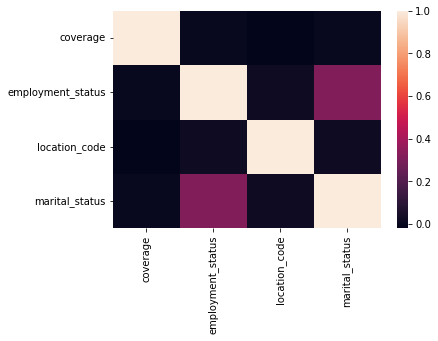

In [40]:
sns.heatmap(cat_encoded.corr())

In [41]:
x_standardized

,customer_lifetime_value,income,monthly_premium_auto
0,-0.762878,2.770661e-01,-0.703925
1,-0.149245,3.465318e-16,0.022691
2,0.710636,-8.046961e-02,0.429596
3,-0.052263,3.465318e-16,0.371467
4,-0.755575,-3.153182e-01,-0.587666
...,...,...,...
9129,2.241590,1.023238e+00,-0.587666
9130,-0.714411,-1.374161e+00,-0.413278
9131,0.023135,3.465318e-16,-0.238891
9132,-0.069935,-1.358111e+00,0.080820


In [71]:
X_treated = pd.concat([x_standardized, cat_encoded], axis=1)
X_treated

,customer_lifetime_value,income,monthly_premium_auto,coverage,employment_status,location_code,marital_status
0,-0.762878,2.770661e-01,-0.703925,0,1,1,1
1,-0.149245,3.465318e-16,0.022691,1,4,1,2
2,0.710636,-8.046961e-02,0.429596,2,1,1,1
3,-0.052263,3.465318e-16,0.371467,0,4,1,1
4,-0.755575,-3.153182e-01,-0.587666,0,1,0,2
...,...,...,...,...,...,...,...
9129,2.241590,1.023238e+00,-0.587666,0,1,2,1
9130,-0.714411,-1.374161e+00,-0.413278,1,1,1,0
9131,0.023135,3.465318e-16,-0.238891,1,4,1,2
9132,-0.069935,-1.358111e+00,0.080820,1,1,1,1


<AxesSubplot:>

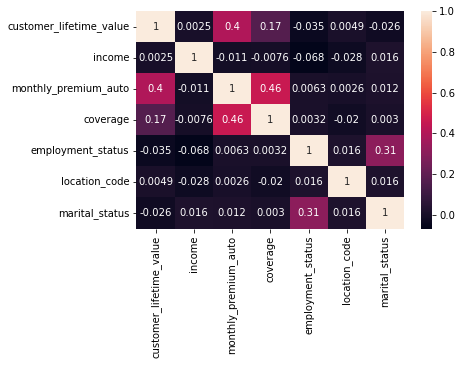

In [72]:
sns.heatmap(X_treated.corr(), annot=True)

In [66]:
# Dropping more useless columns, there is almost no correlation useful

# X_treated = X_treated.drop(["income", "customer_lifetime_value", "coverage", "location_code", "marital_status", "total_claim_amount"], axis=1)

# This actually made the model worse, let's try being more generous

# X_treated = X_treated.drop(["income", "marital_status", "total_claim_amount"], axis=1)

# Nope

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X_treated, y, test_size=0.2, random_state=42)

In [74]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7307, 7)
(1827, 7)
(7307,)
(1827,)


In [75]:
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)
train_predictions = lm.predict(X_train)
print("R2 score por training is:", r2_score(y_train, train_predictions))

test_predictions = lm.predict(X_test)
print("R2 score por testing is:", r2_score(y_test, test_predictions))
print("MSE for testing is:", mean_squared_error(y_test, test_predictions))
print("RMSE for testing is:", np.sqrt(mean_squared_error(y_test, test_predictions)))
print("MAE for testing is:", mean_absolute_error(y_test, test_predictions))

R2 score por training is: 0.5976119556213452
R2 score por testing is: 0.5848406646402879
MSE for testing is: 33009.75083922799
RMSE for testing is: 181.68585756527114
MAE for testing is: 134.63295948407554
